# Perturbative solver demo

This demo walks through the construction and usage of `PerturbativeSolver` objects for simulating a 2 transmon gate, comparing to traditional solvers using both dense and sparse arrays.

In [1]:
from time import time

import numpy as np

import jax.numpy as jnp
from jax.scipy.linalg import expm as jexpm
from jax.scipy.special import erf
from jax import jit, value_and_grad


from qiskit.quantum_info import Operator

from qiskit_dynamics import Solver, Signal
from qiskit_dynamics.perturbation import PerturbativeSolver

Configure to use JAX.

In [2]:
from qiskit_dynamics.array import Array

# configure jax to use 64 bit mode
import jax
jax.config.update("jax_enable_x64", True)

# tell JAX we are using CPU
jax.config.update('jax_platform_name', 'cpu')

# set default backend
Array.set_default_backend('jax')

In [1]:
# import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd

#%%
mpl.rcParams['figure.dpi'] = 600



#%%

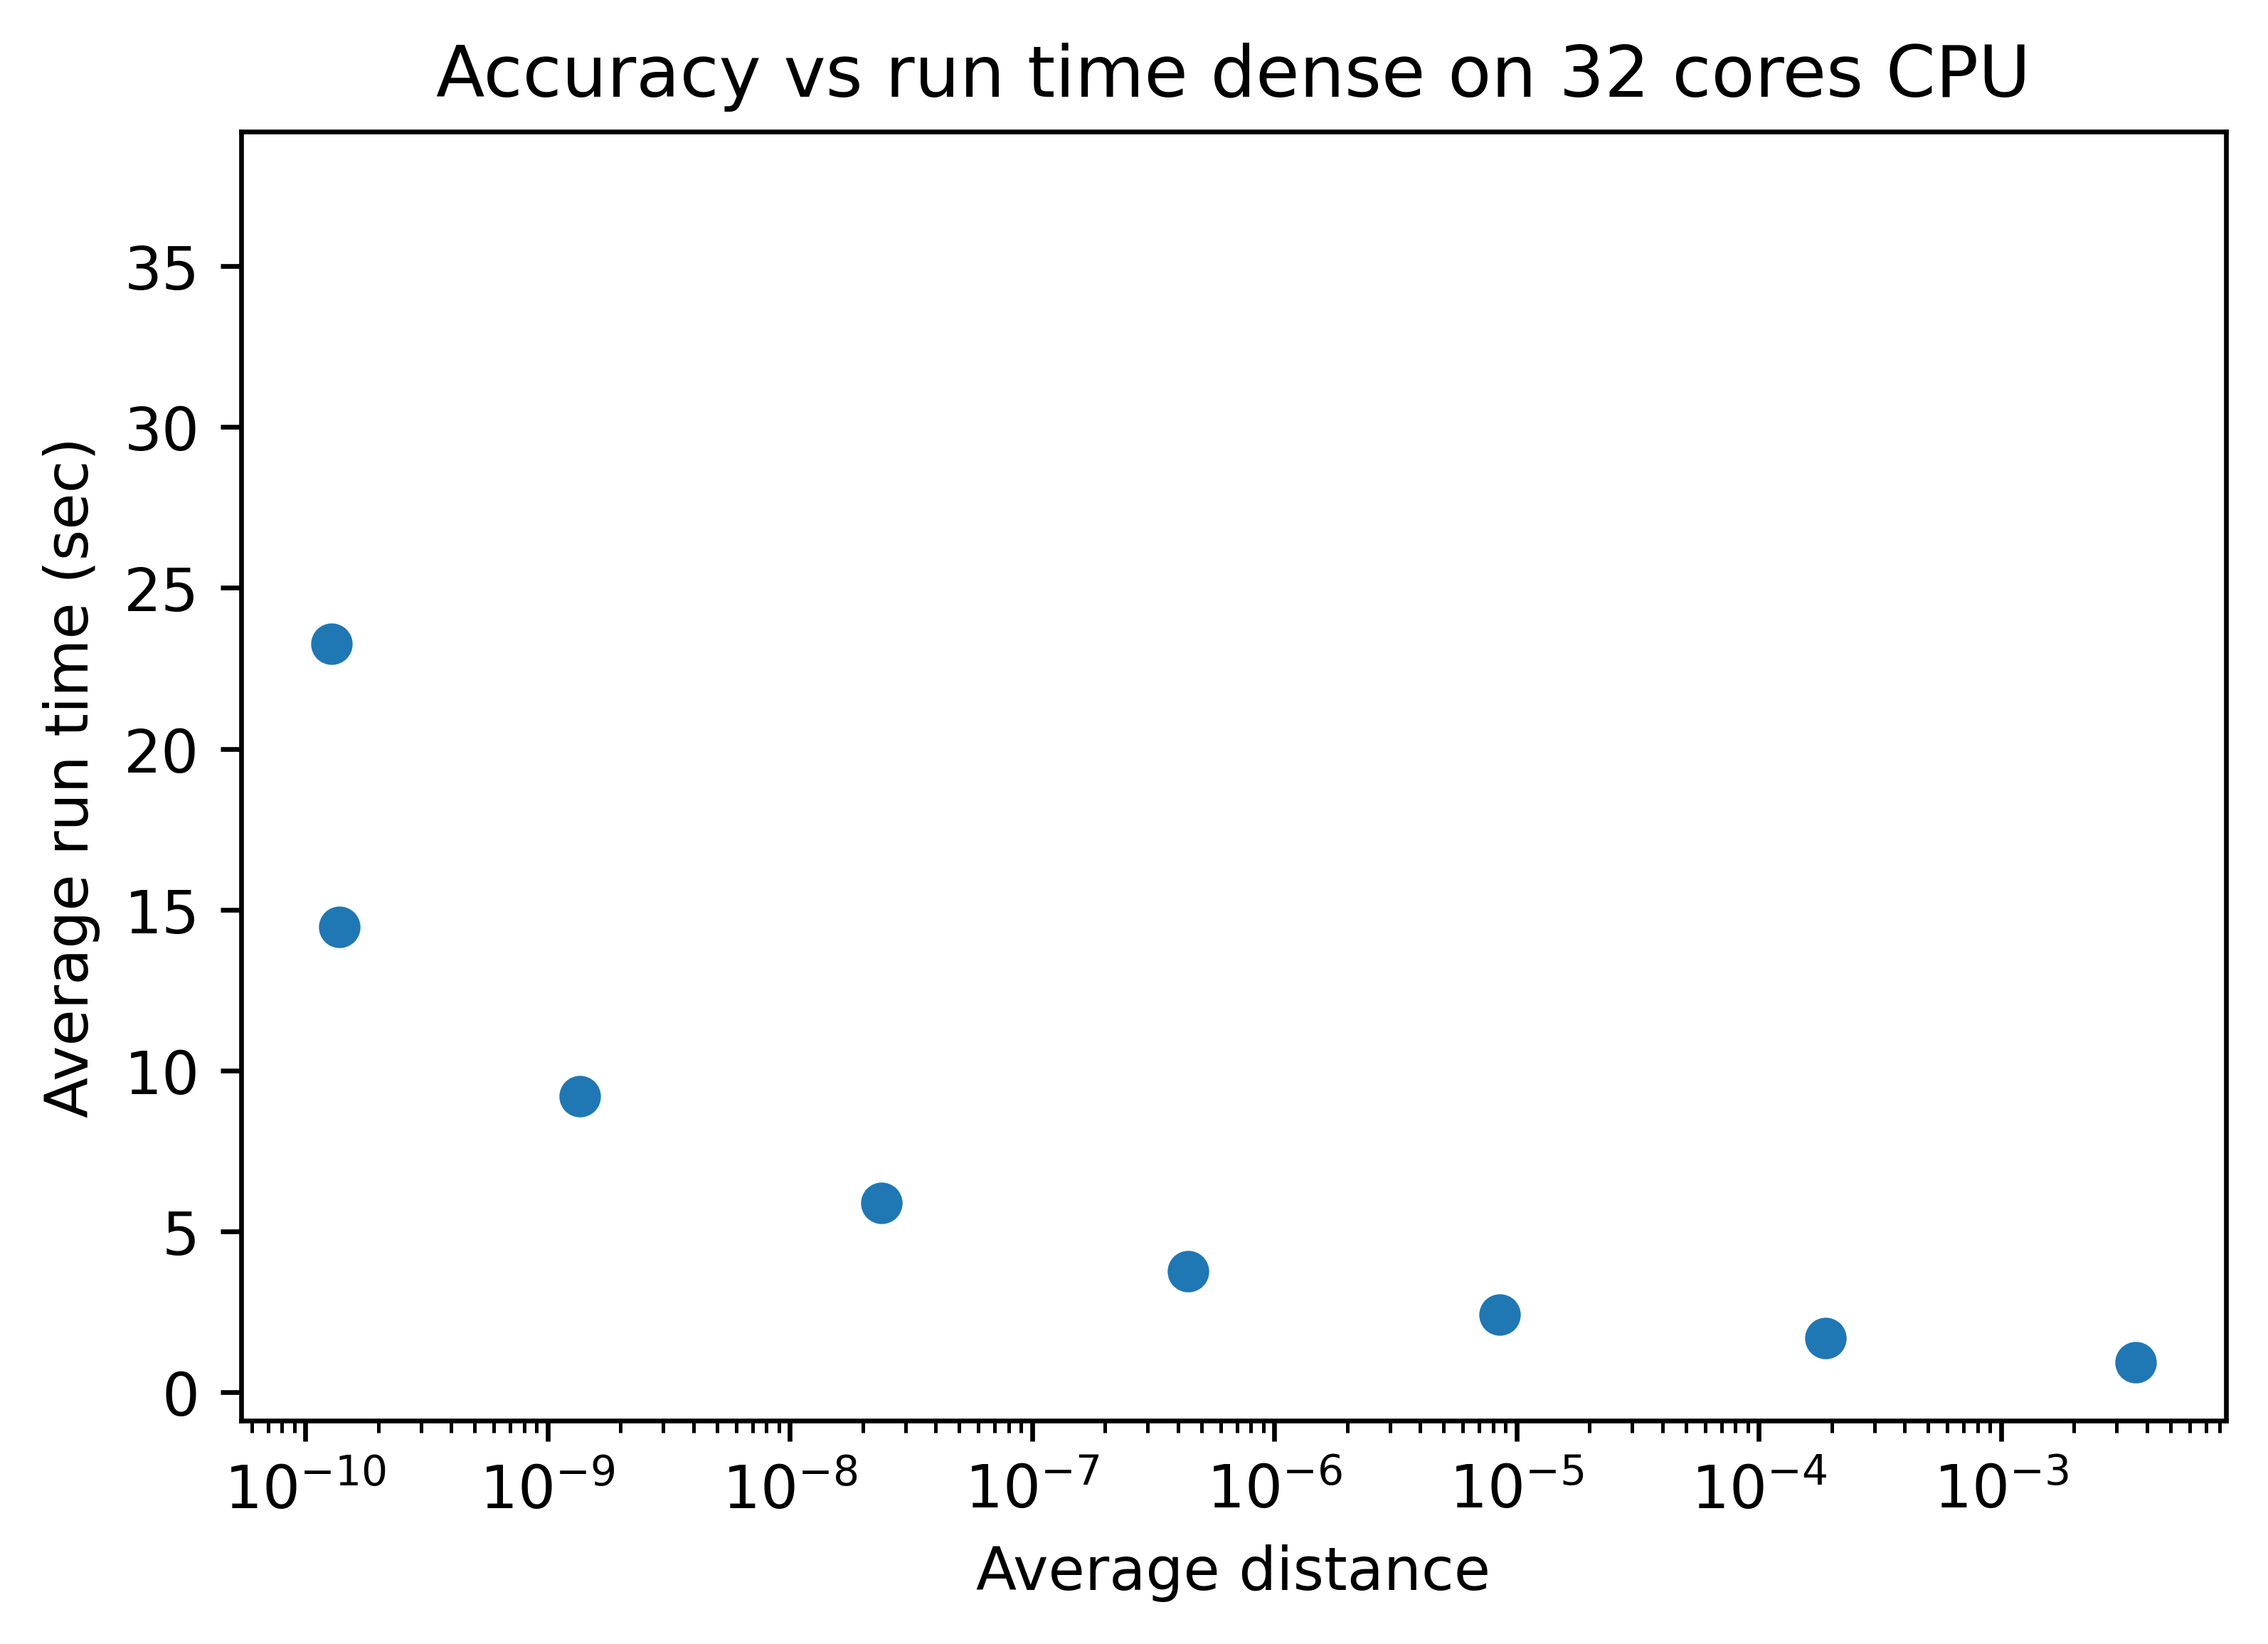

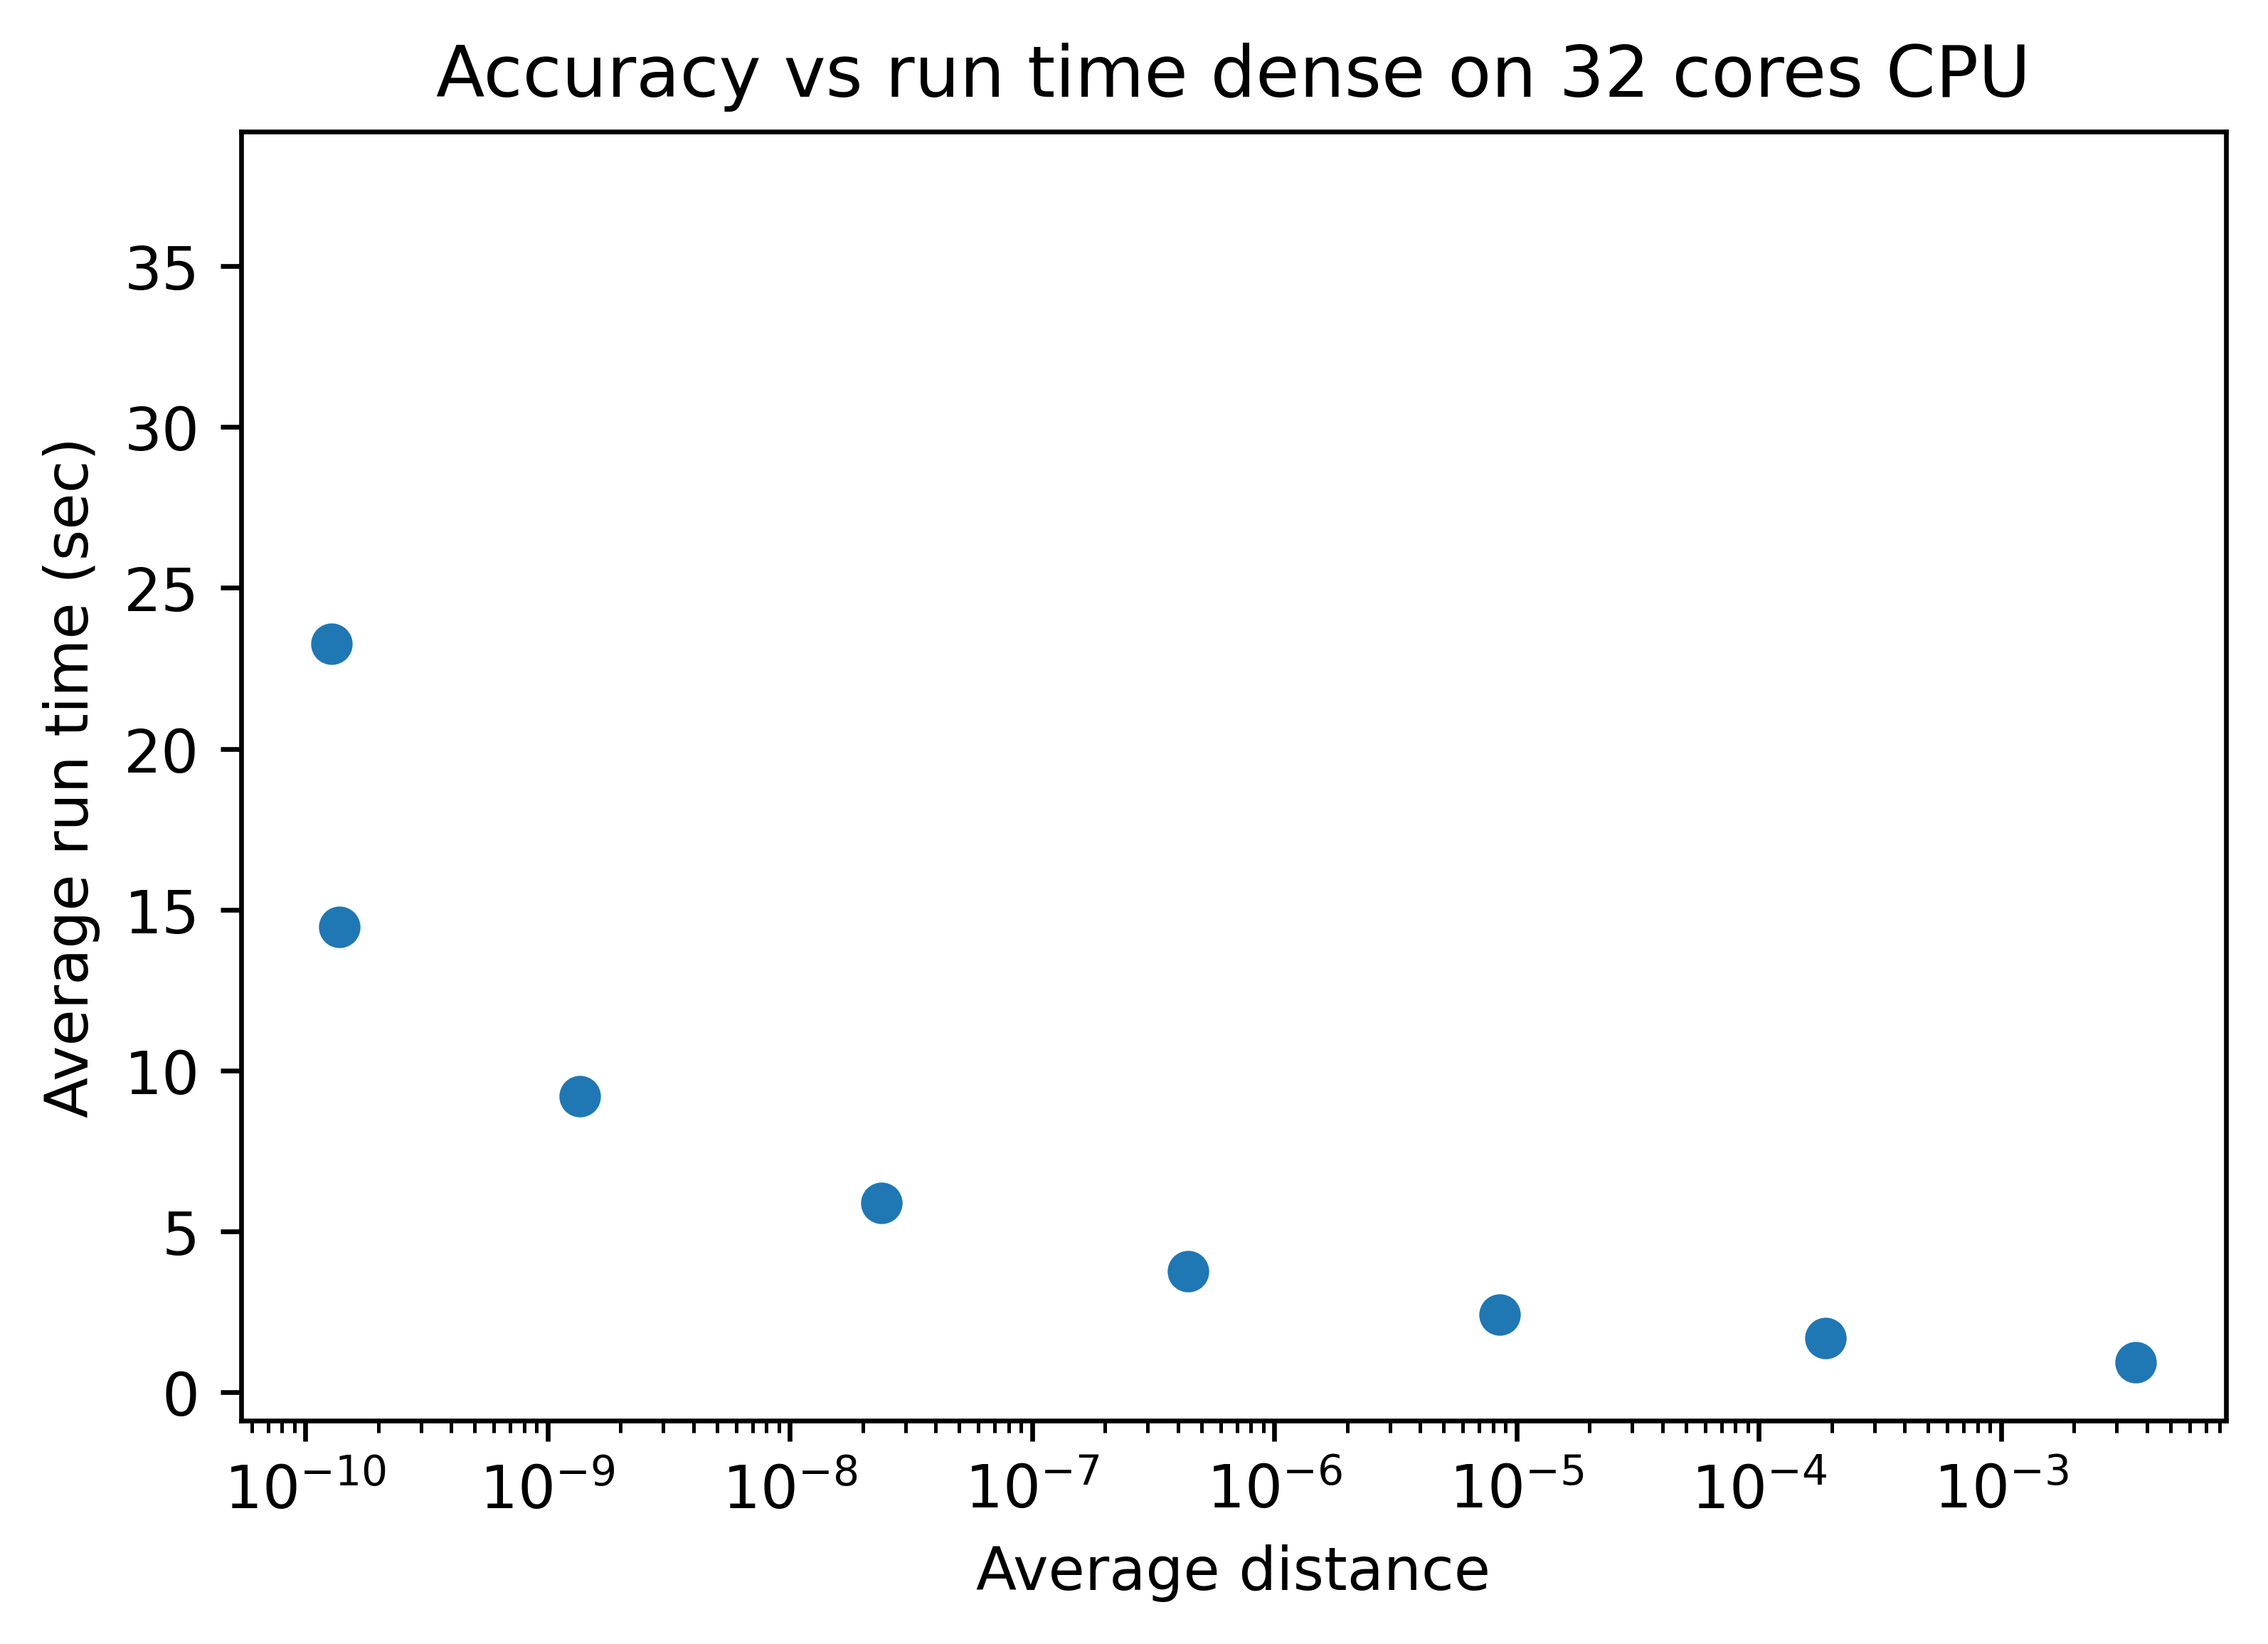

In [5]:
# ax, fig = plt.figure()
# ax.set


df = pd.read_csv('dense_results_cpu.csv')
fig = mpl.pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xscale('log')

ax.set_xlabel('Average distance') # (normalized difference from accurate gate fidelity
ax.set_ylabel('Average run time (sec)')
ax.set_title("Accuracy vs run time dense on 32 cores CPU")

ax.scatter(y='ave_run_time', x='ave_distance', data=df)
fig


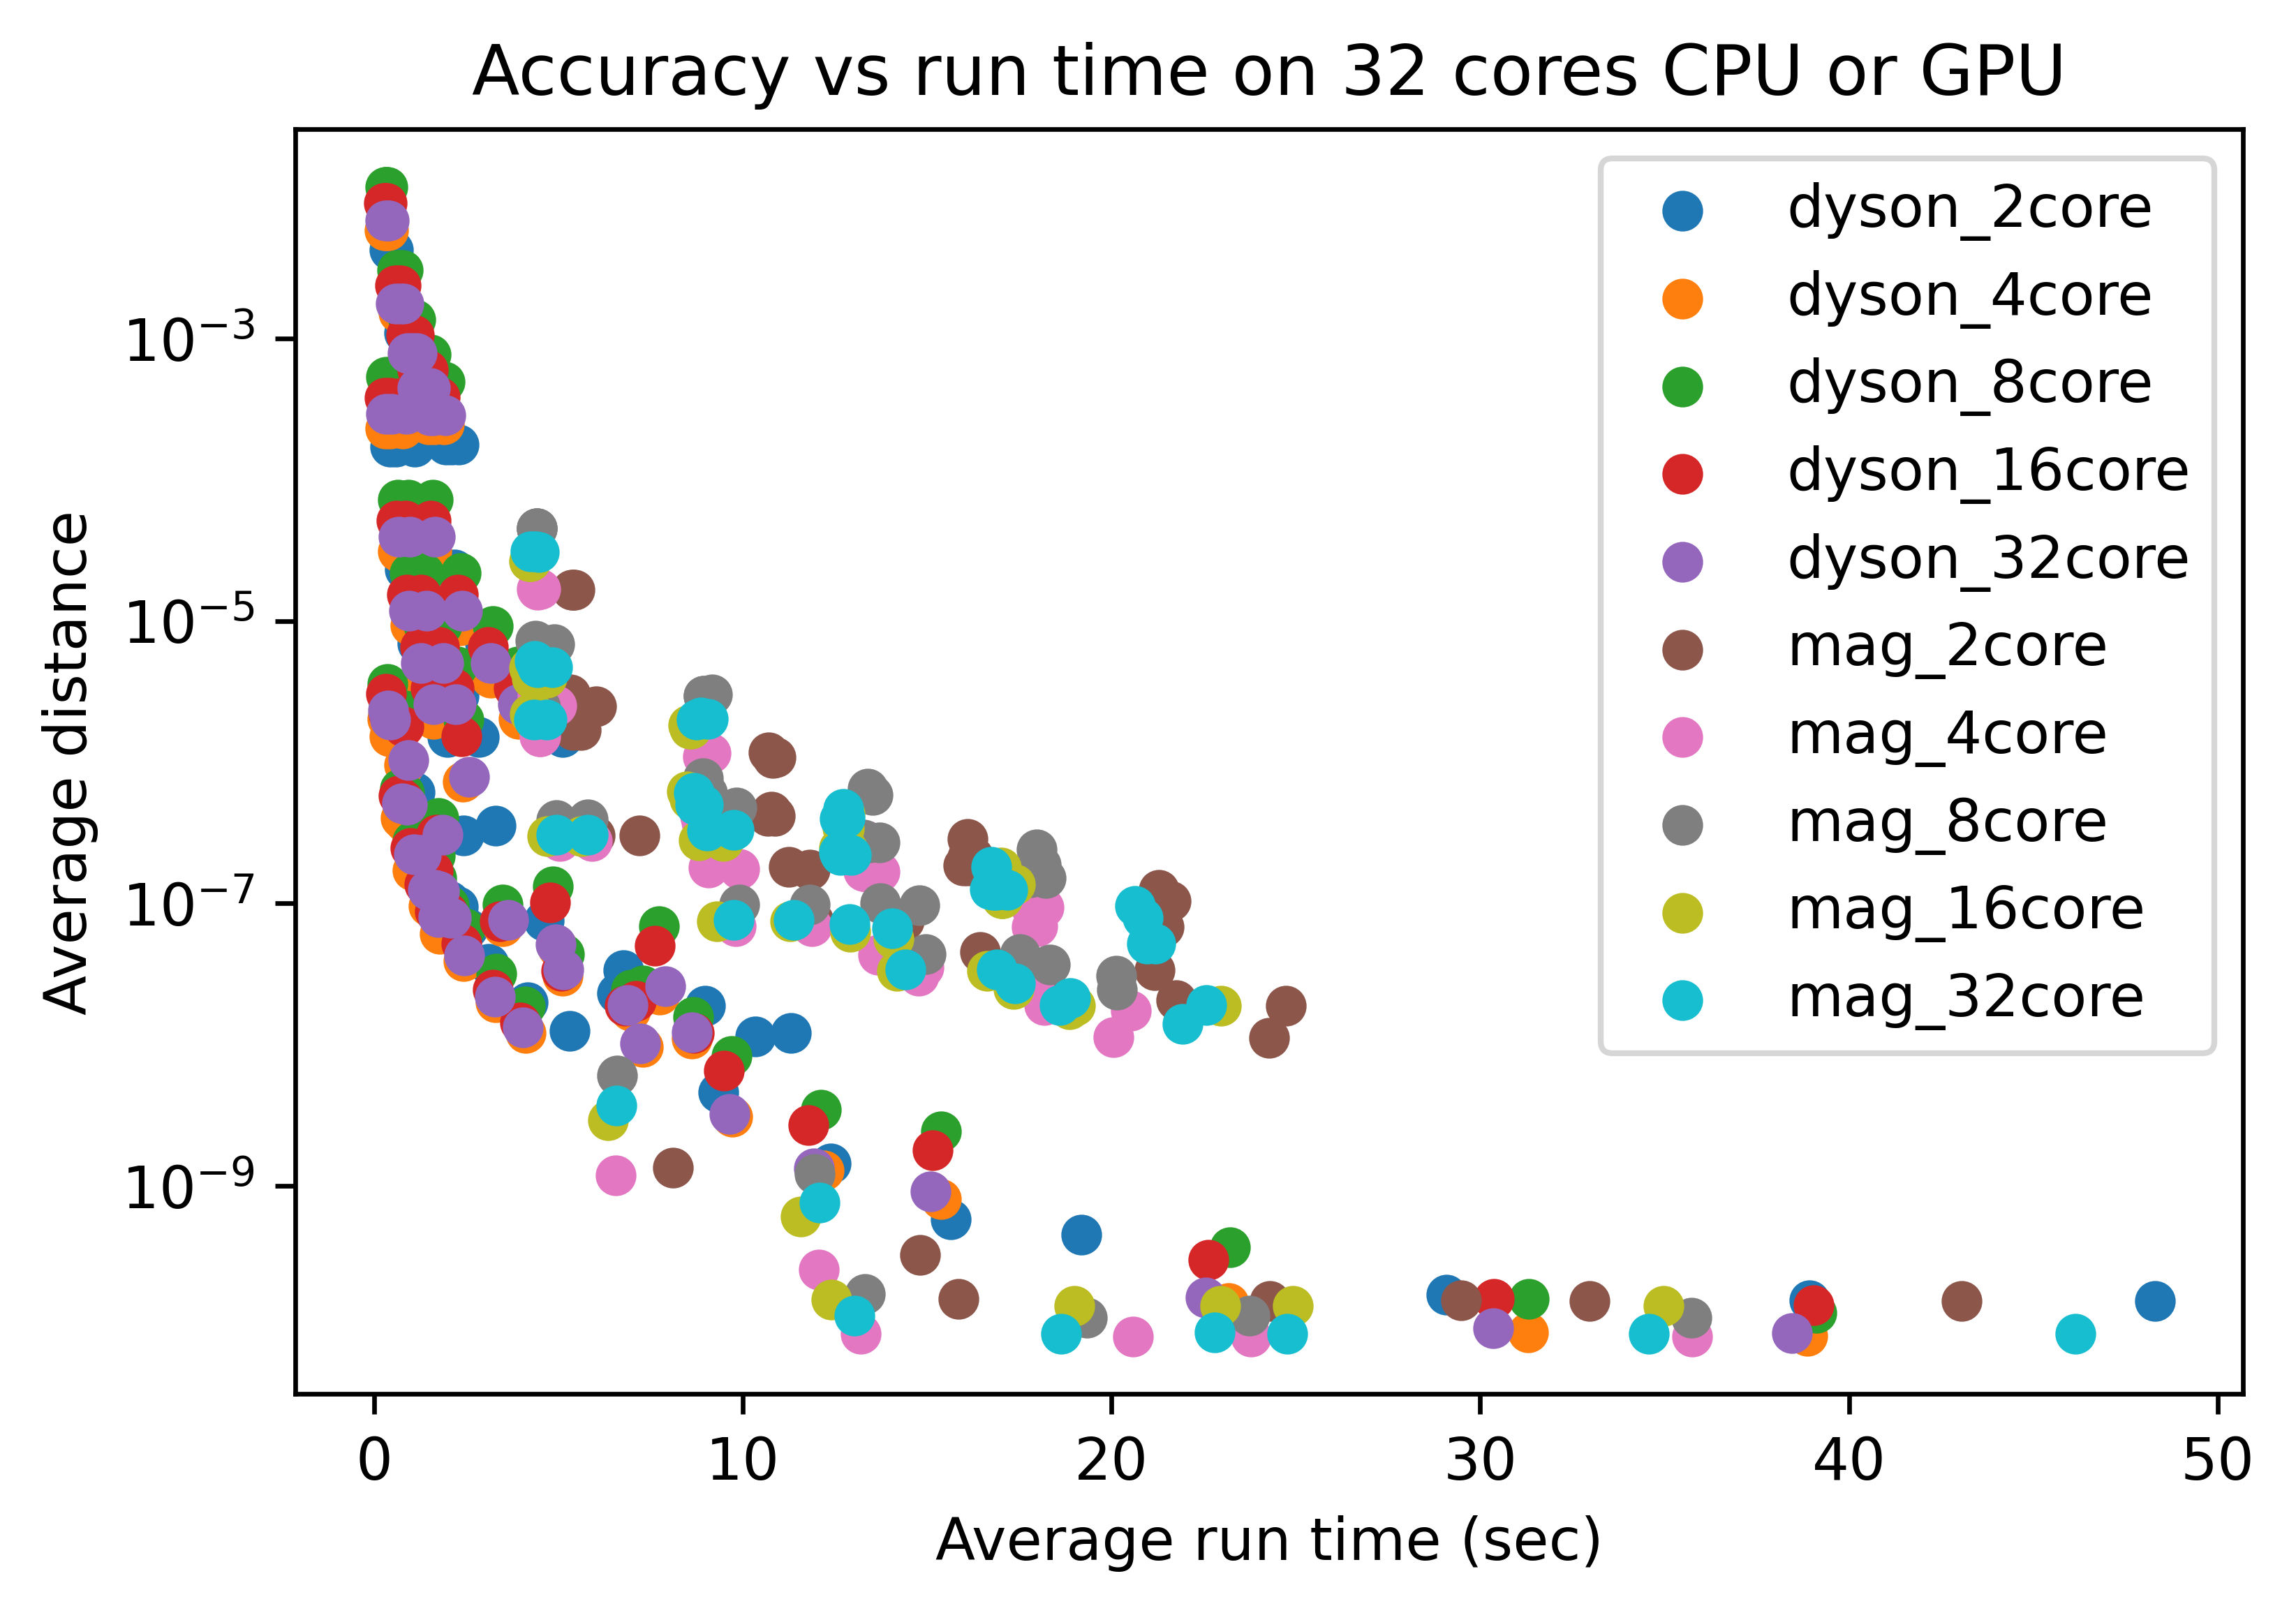

In [ ]:
# ax, fig = plt.figure()
# ax.set


# df = pd.read_csv('dense_results_cpu.csv')

# df_sparse = pd.read_csv('sparse_results_cpu.csv')

df_dys2 = pd.read_csv('results/dense_results_2core.csv')
df_dys4 = pd.read_csv('results/dense.csv')
df_dys8 = pd.read_csv('results/dense.csv')
df_dys16 = pd.read_csv('results/dense.csv')
df_dys32 = pd.read_csv('results/dense.csv')

df_mag2 = pd.read_csv('results/sparse_results_2core.csv')
df_mag4 = pd.read_csv('results/sparse.csv')
df_mag8 = pd.read_csv('results/sparse.csv')
df_mag16 = pd.read_csv('results/sparse.csv')
df_mag32 = pd.read_csv('results/sparse.csv')


# Z
# df_pert1 = pd.read_csv('results/dyson_results_2core.csv')

# df_magn = pd.read_csv('results/perturbative_results_gpu_magnus.csv')


fig = mpl.pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.set_yscale('log')

# ax.set_xscale('log')

ax.set_ylabel('Average distance') # (normalized difference from accurate gate fidelity
ax.set_xlabel('Average run time (sec)')
ax.set_title("Accuracy vs run time on 32 cores CPU or GPU")

ax.scatter(x='ave_run_time', y='ave_distance', data=df_dys2, label='dense_2core')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_dys4, label='dense_4core')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_dys8, label='dense_8core')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_dys16, label='dense_16core')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_dys32, label='dense_32core')


ax.scatter(x='ave_run_time', y='ave_distance', data=df_mag2, label='sparse_2core')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_mag4, label='sparse_4core')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_mag8, label='sparse_8core')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_mag16, label='sparse_16core')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_mag32, label='sparse_32core')



ax.legend()




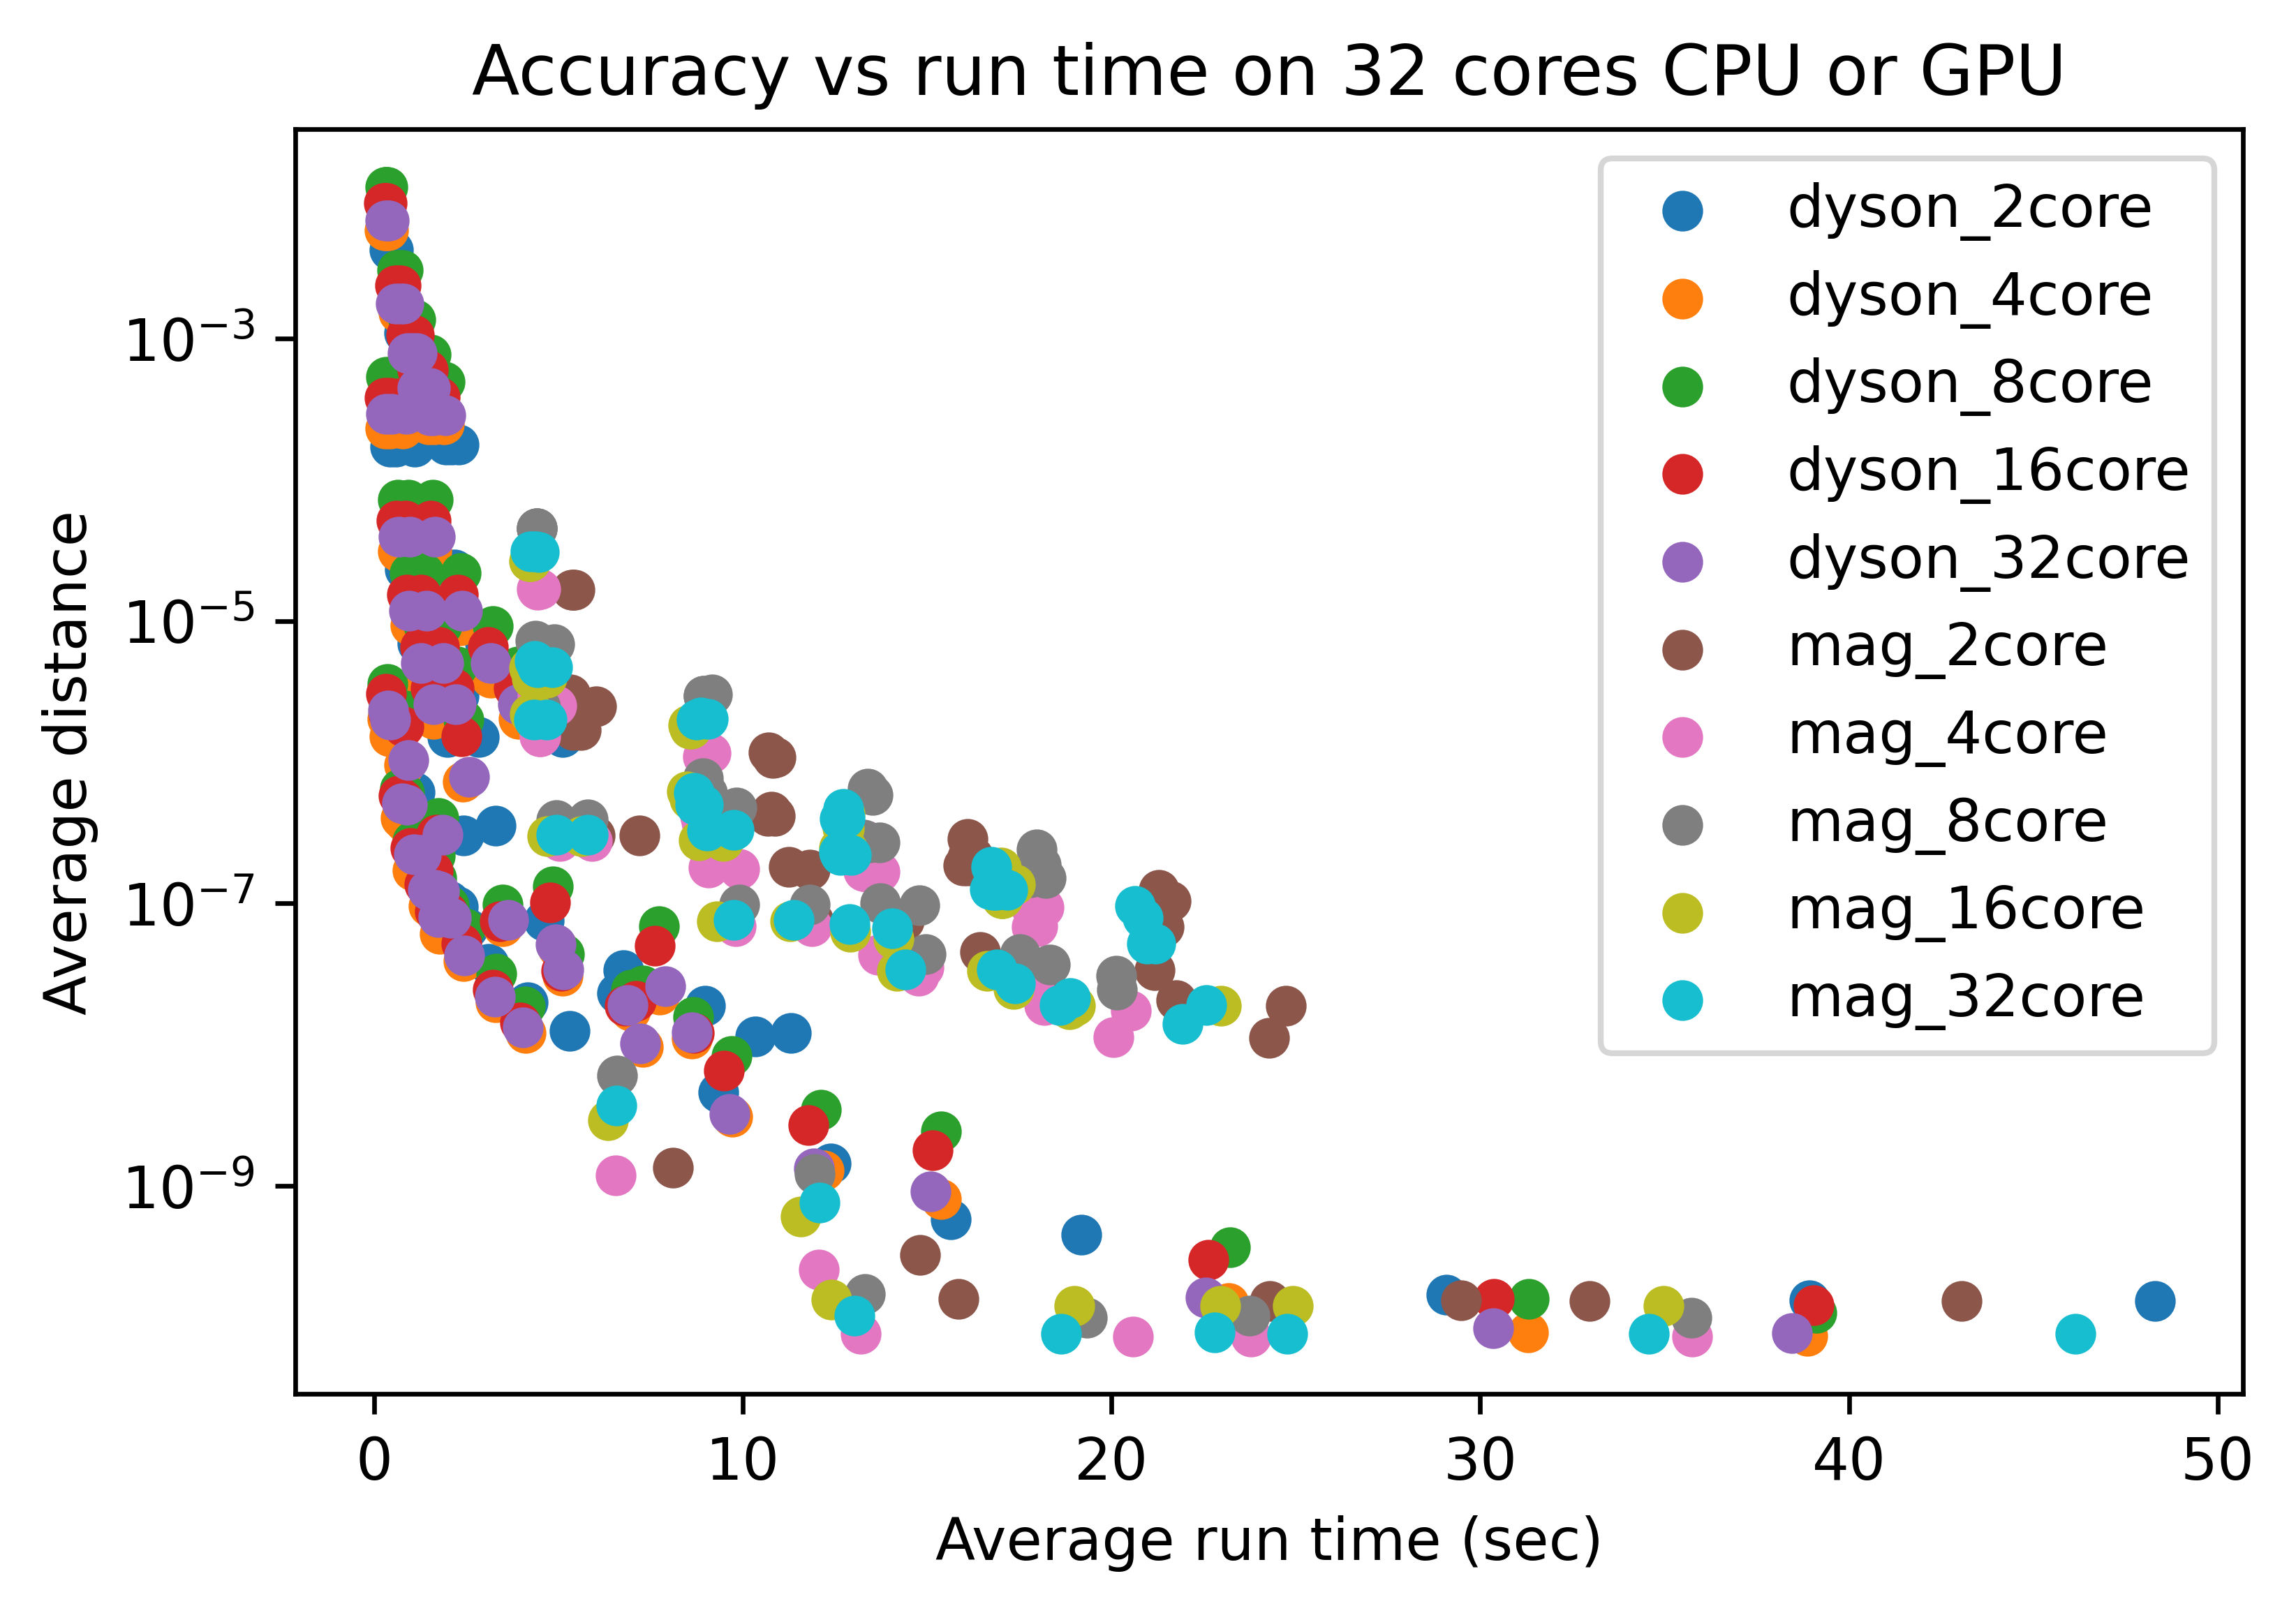

In [5]:
# ax, fig = plt.figure()
# ax.set


# df = pd.read_csv('dense_results_cpu.csv')

# df_sparse = pd.read_csv('sparse_results_cpu.csv')

df_dys2 = pd.read_csv('results/dyson_results_2core.csv')
df_dys4 = pd.read_csv('results/dyson_results_4core.csv')
df_dys8 = pd.read_csv('results/dyson_results_8core.csv')
df_dys16 = pd.read_csv('results/dyson_results_16core.csv')
df_dys32 = pd.read_csv('results/dyson_results_32core.csv')

df_mag2 = pd.read_csv('results/magnus_results_2core.csv')
df_mag4 = pd.read_csv('results/magnus_results_4core.csv')
df_mag8 = pd.read_csv('results/magnus_results_8core.csv')
df_mag16 = pd.read_csv('results/magnus_results_16core.csv')
df_mag32 = pd.read_csv('results/magnus_results_32core.csv')


# Z
# df_pert1 = pd.read_csv('results/dyson_results_2core.csv')

# df_magn = pd.read_csv('results/perturbative_results_gpu_magnus.csv')


fig = mpl.pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.set_yscale('log')

# ax.set_xscale('log')

ax.set_ylabel('Average distance') # (normalized difference from accurate gate fidelity
ax.set_xlabel('Average run time (sec)')
ax.set_title("Accuracy vs run time on 32 cores CPU or GPU")

ax.scatter(x='ave_run_time', y='ave_distance', data=df_dys2, label='dyson_2core')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_dys4, label='dyson_4core')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_dys8, label='dyson_8core')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_dys16, label='dyson_16core')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_dys32, label='dyson_32core')


ax.scatter(x='ave_run_time', y='ave_distance', data=df_mag2, label='mag_2core')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_mag4, label='mag_4core')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_mag8, label='mag_8core')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_mag16, label='mag_16core')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_mag32, label='mag_32core')



ax.legend()




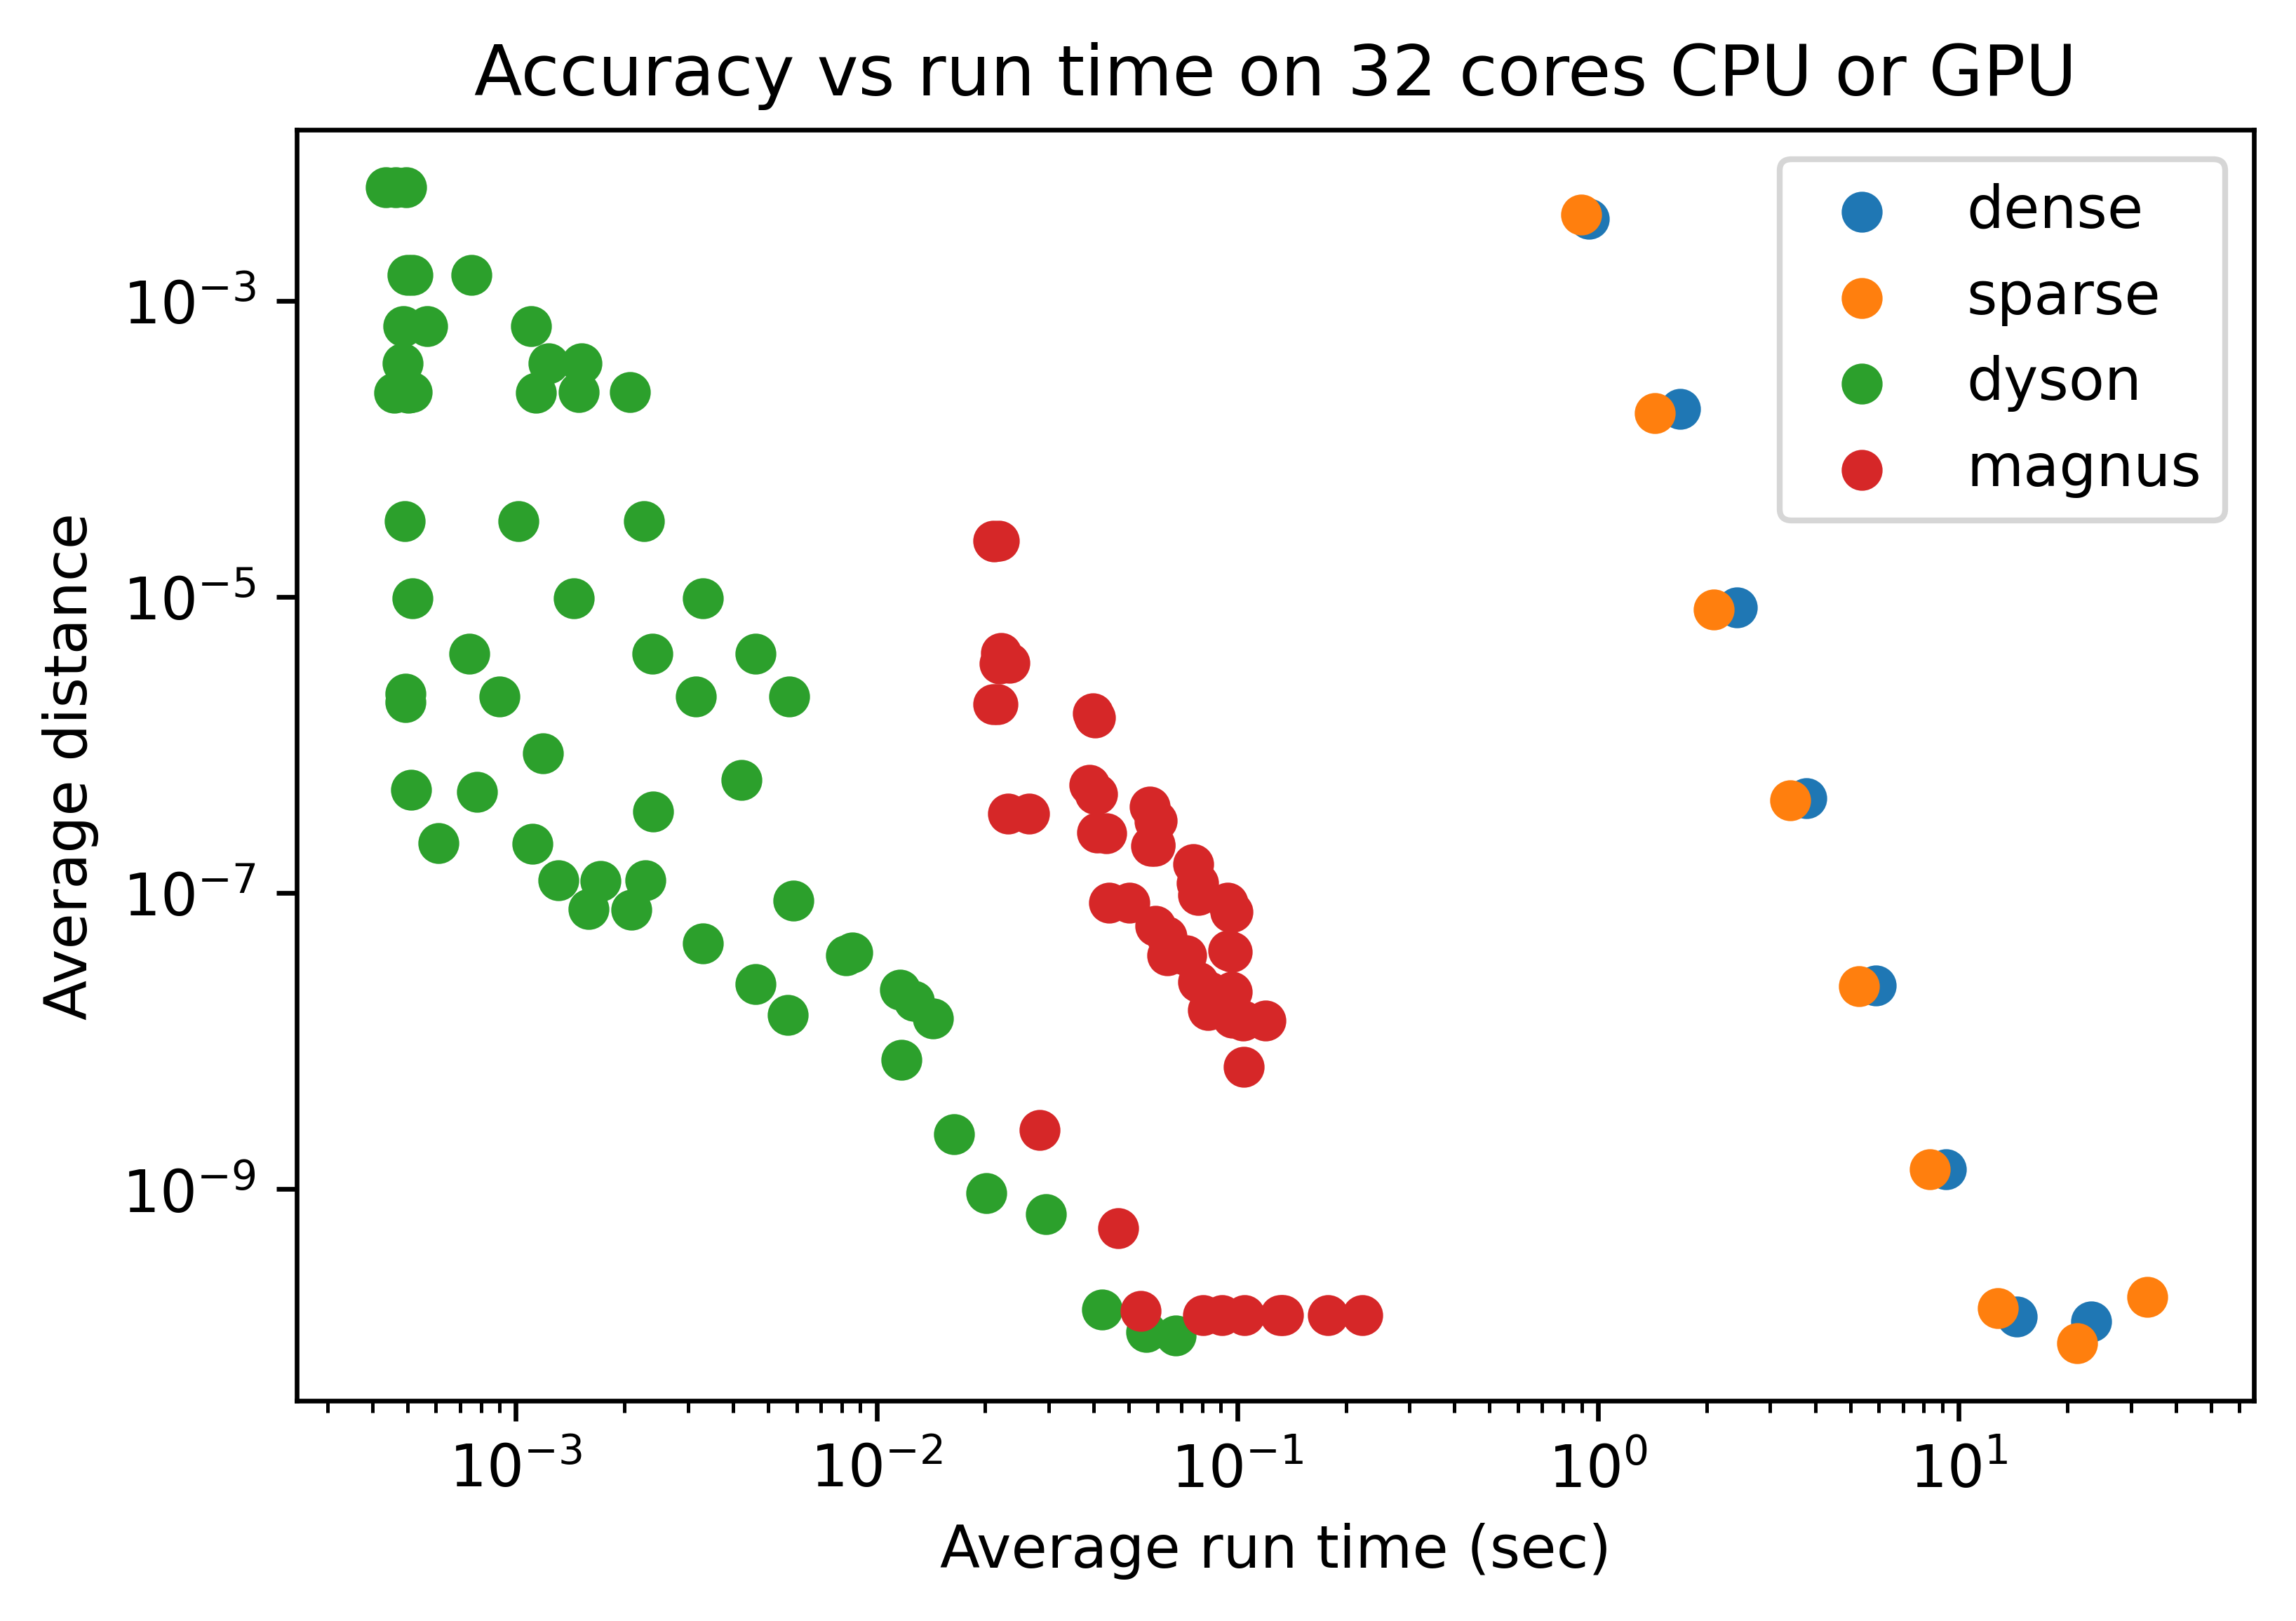

In [6]:
# ax, fig = plt.figure()
# ax.set


df = pd.read_csv('dense_results_cpu.csv')

df_sparse = pd.read_csv('sparse_results_cpu.csv')

df_pert = pd.read_csv('results/perturbative_results_gpu.csv')

df_magn = pd.read_csv('results/perturbative_results_gpu_magnus.csv')


fig = mpl.pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.set_yscale('log')

ax.set_xscale('log')

ax.set_ylabel('Average distance') # (normalized difference from accurate gate fidelity
ax.set_xlabel('Average run time (sec)')
ax.set_title("Accuracy vs run time on 32 cores CPU or GPU")

ax.scatter(x='ave_run_time', y='ave_distance', data=df, label='dense')

ax.scatter(x='ave_run_time', y='ave_distance', data=df_sparse, label='sparse')

ax.scatter(x='ave_run_time', y='ave_distance', data=df_pert, label='dyson')

ax.scatter(x='ave_run_time', y='ave_distance', data=df_magn, label='magnus')


ax.legend()



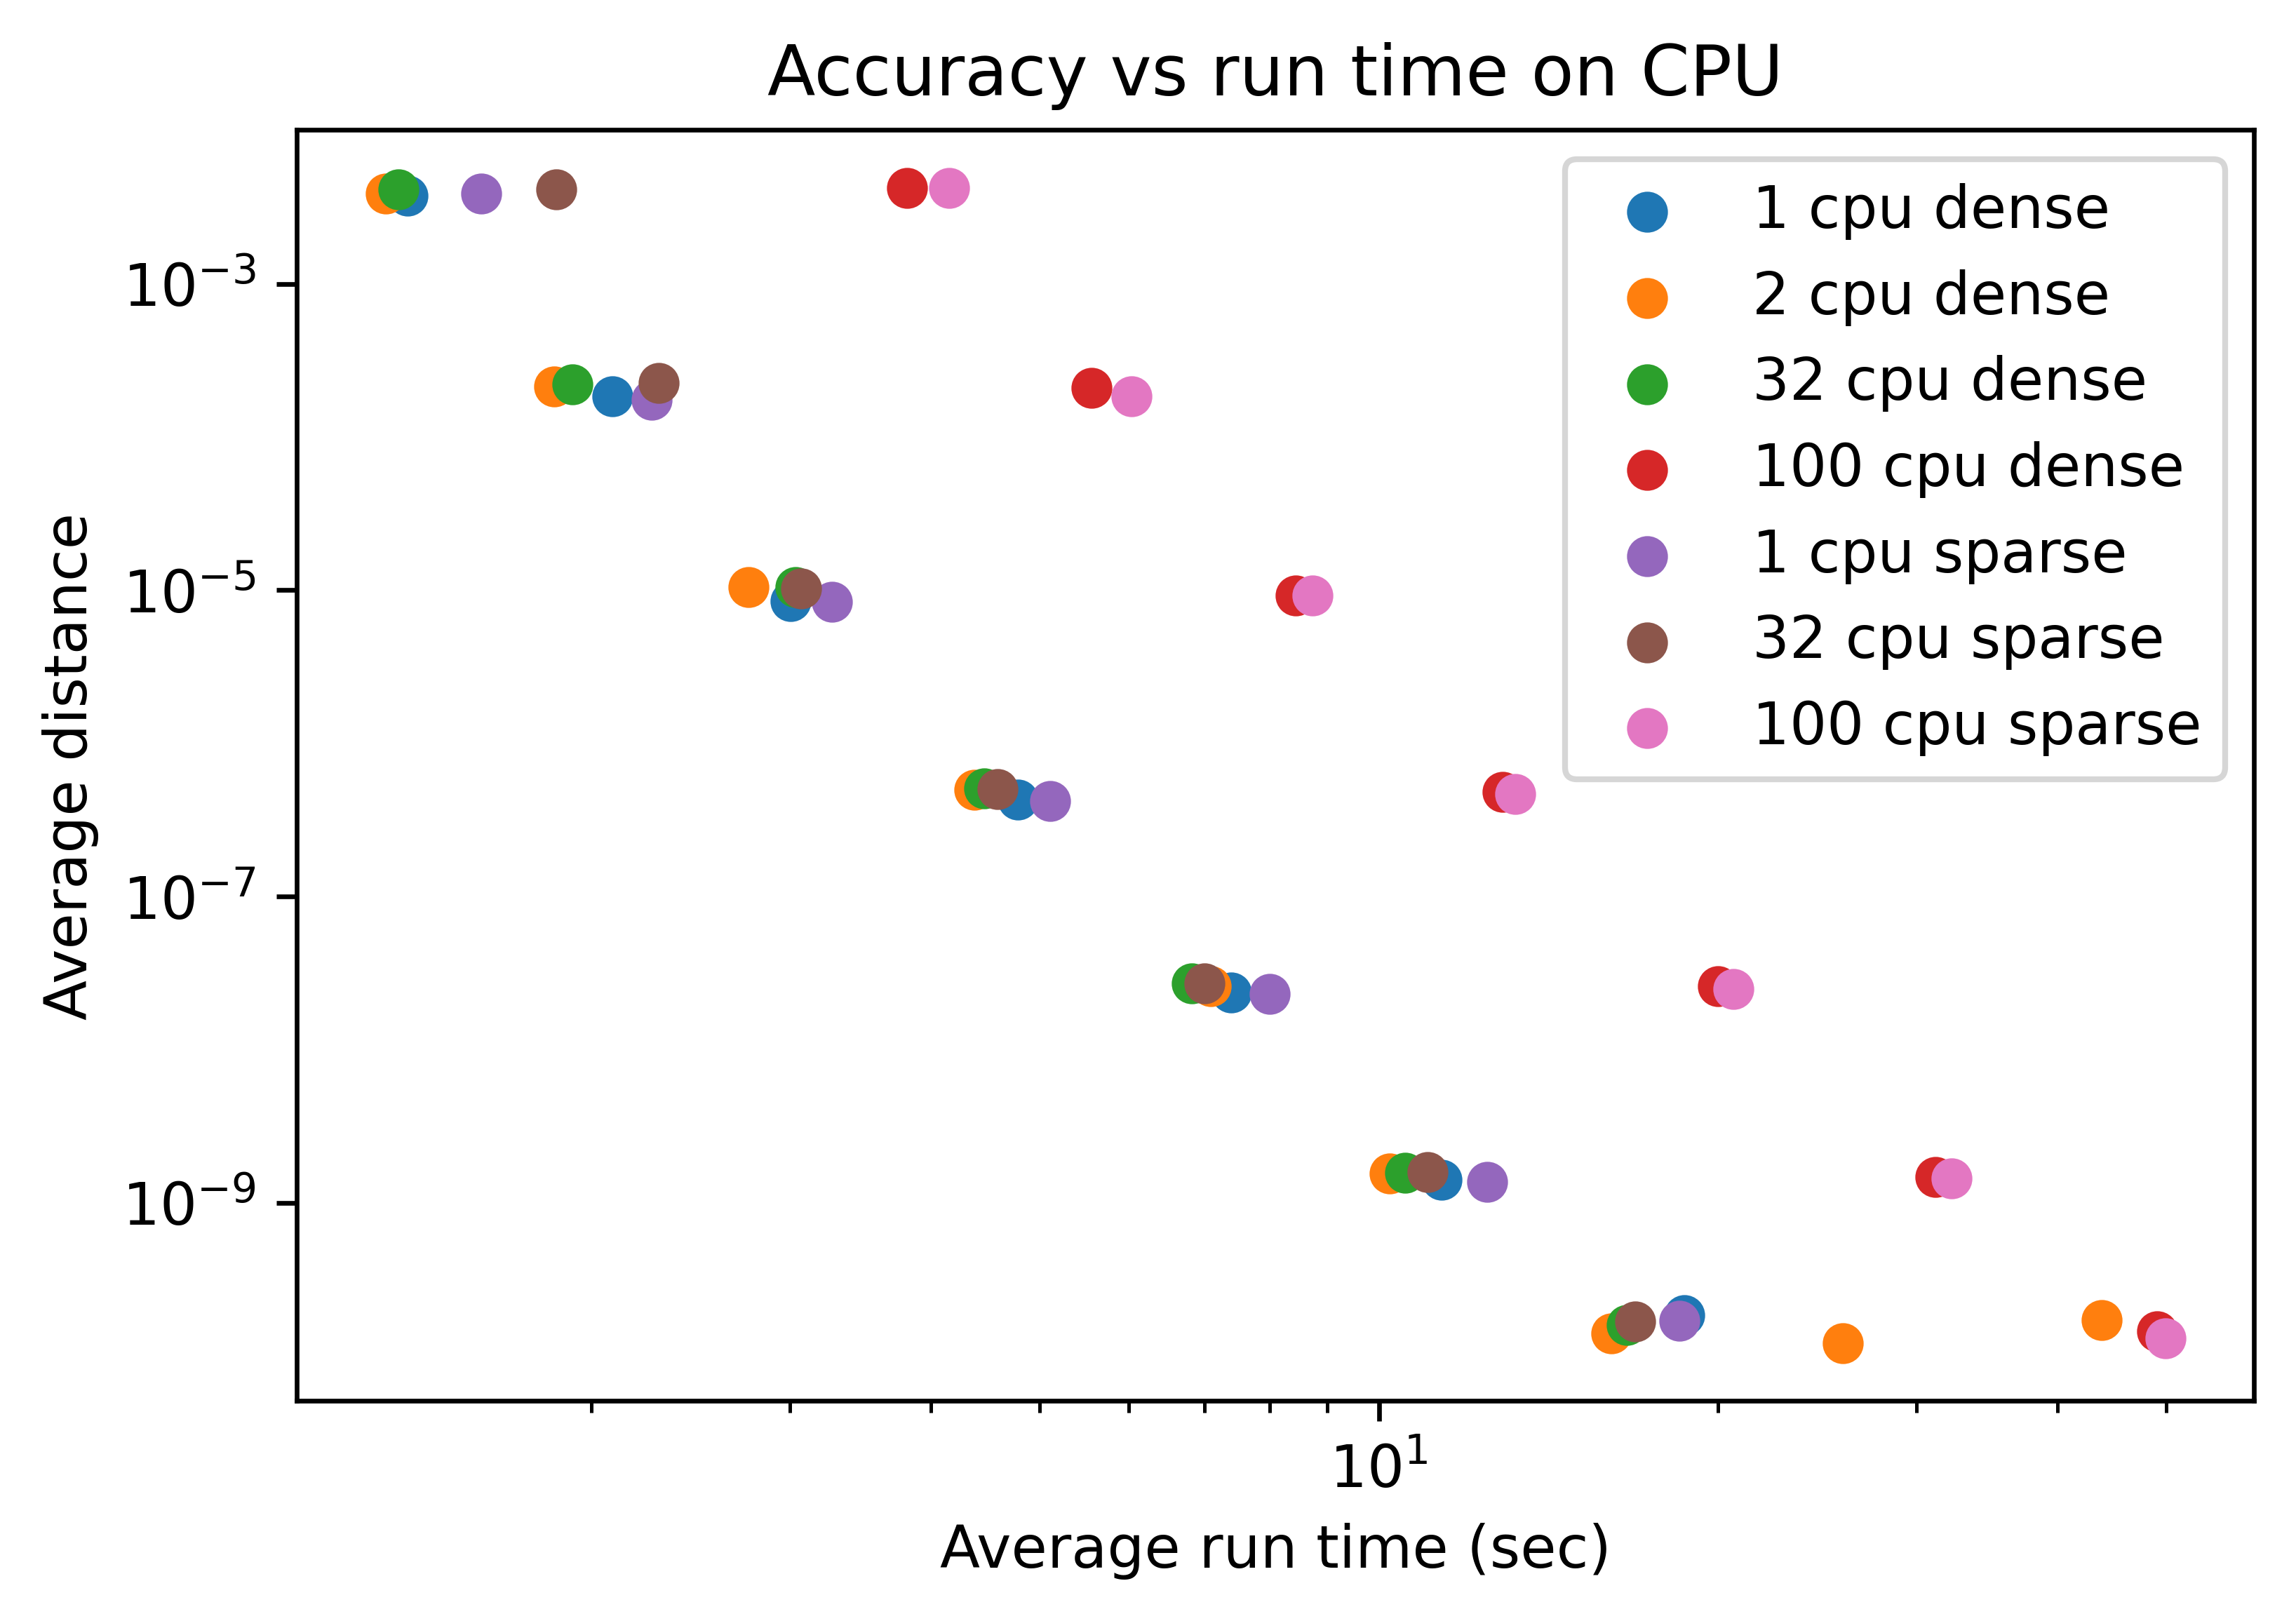

In [9]:
# ax, fig = plt.figure()
# ax.set


# df = pd.read_csv('dense_results_cpu.csv')

# df_sparse = pd.read_csv('sparse_results_cpu.csv')

df_pert = pd.read_csv('results/perturbative_results_gpu.csv')

df_dense_1 = pd.read_csv('dense_results_cpu_1.csv')
df_dense_32 = pd.read_csv('dense_results_cpu_32.csv')
df_dense_2 = pd.read_csv('dense_results_cpu_2.csv')
df_dense_100 = pd.read_csv('dense_results_cpu_100.csv')

df_sparse_1 = pd.read_csv('sparse_results_gpu_1.csv')
df_sparse_32 = pd.read_csv('sparse_results_gpu_32.csv')
df_sparse_100 = pd.read_csv('sparse_results_gpu_100.csv')


fig = mpl.pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.set_yscale('log')

ax.set_xscale('log')

ax.set_ylabel('Average distance') # (normalized difference from accurate gate fidelity
ax.set_xlabel('Average run time (sec)')
ax.set_title("Accuracy vs run time on CPU")

# ax.scatter(x='ave_run_time', y='ave_distance', data=df, label='dense')

# ax.scatter(x='ave_run_time', y='ave_distance', data=df_sparse, label='sparse')

# ax.scatter(x='ave_run_time', y='ave_distance', data=df_pert, label='pert')

ax.scatter(x='ave_run_time', y='ave_distance', data=df_dense_1, label='1 cpu dense')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_dense_2, label='2 cpu dense')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_dense_32, label='32 cpu dense')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_dense_100, label='100 cpu dense')

ax.scatter(x='ave_run_time', y='ave_distance', data=df_sparse_1, label='1 cpu sparse')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_sparse_32, label='32 cpu sparse')
ax.scatter(x='ave_run_time', y='ave_distance', data=df_sparse_100, label='100 cpu sparse')


ax.legend()

In [8]:
df_pert.drop(['Unnamed: 0'], axis=1, inplace=True)

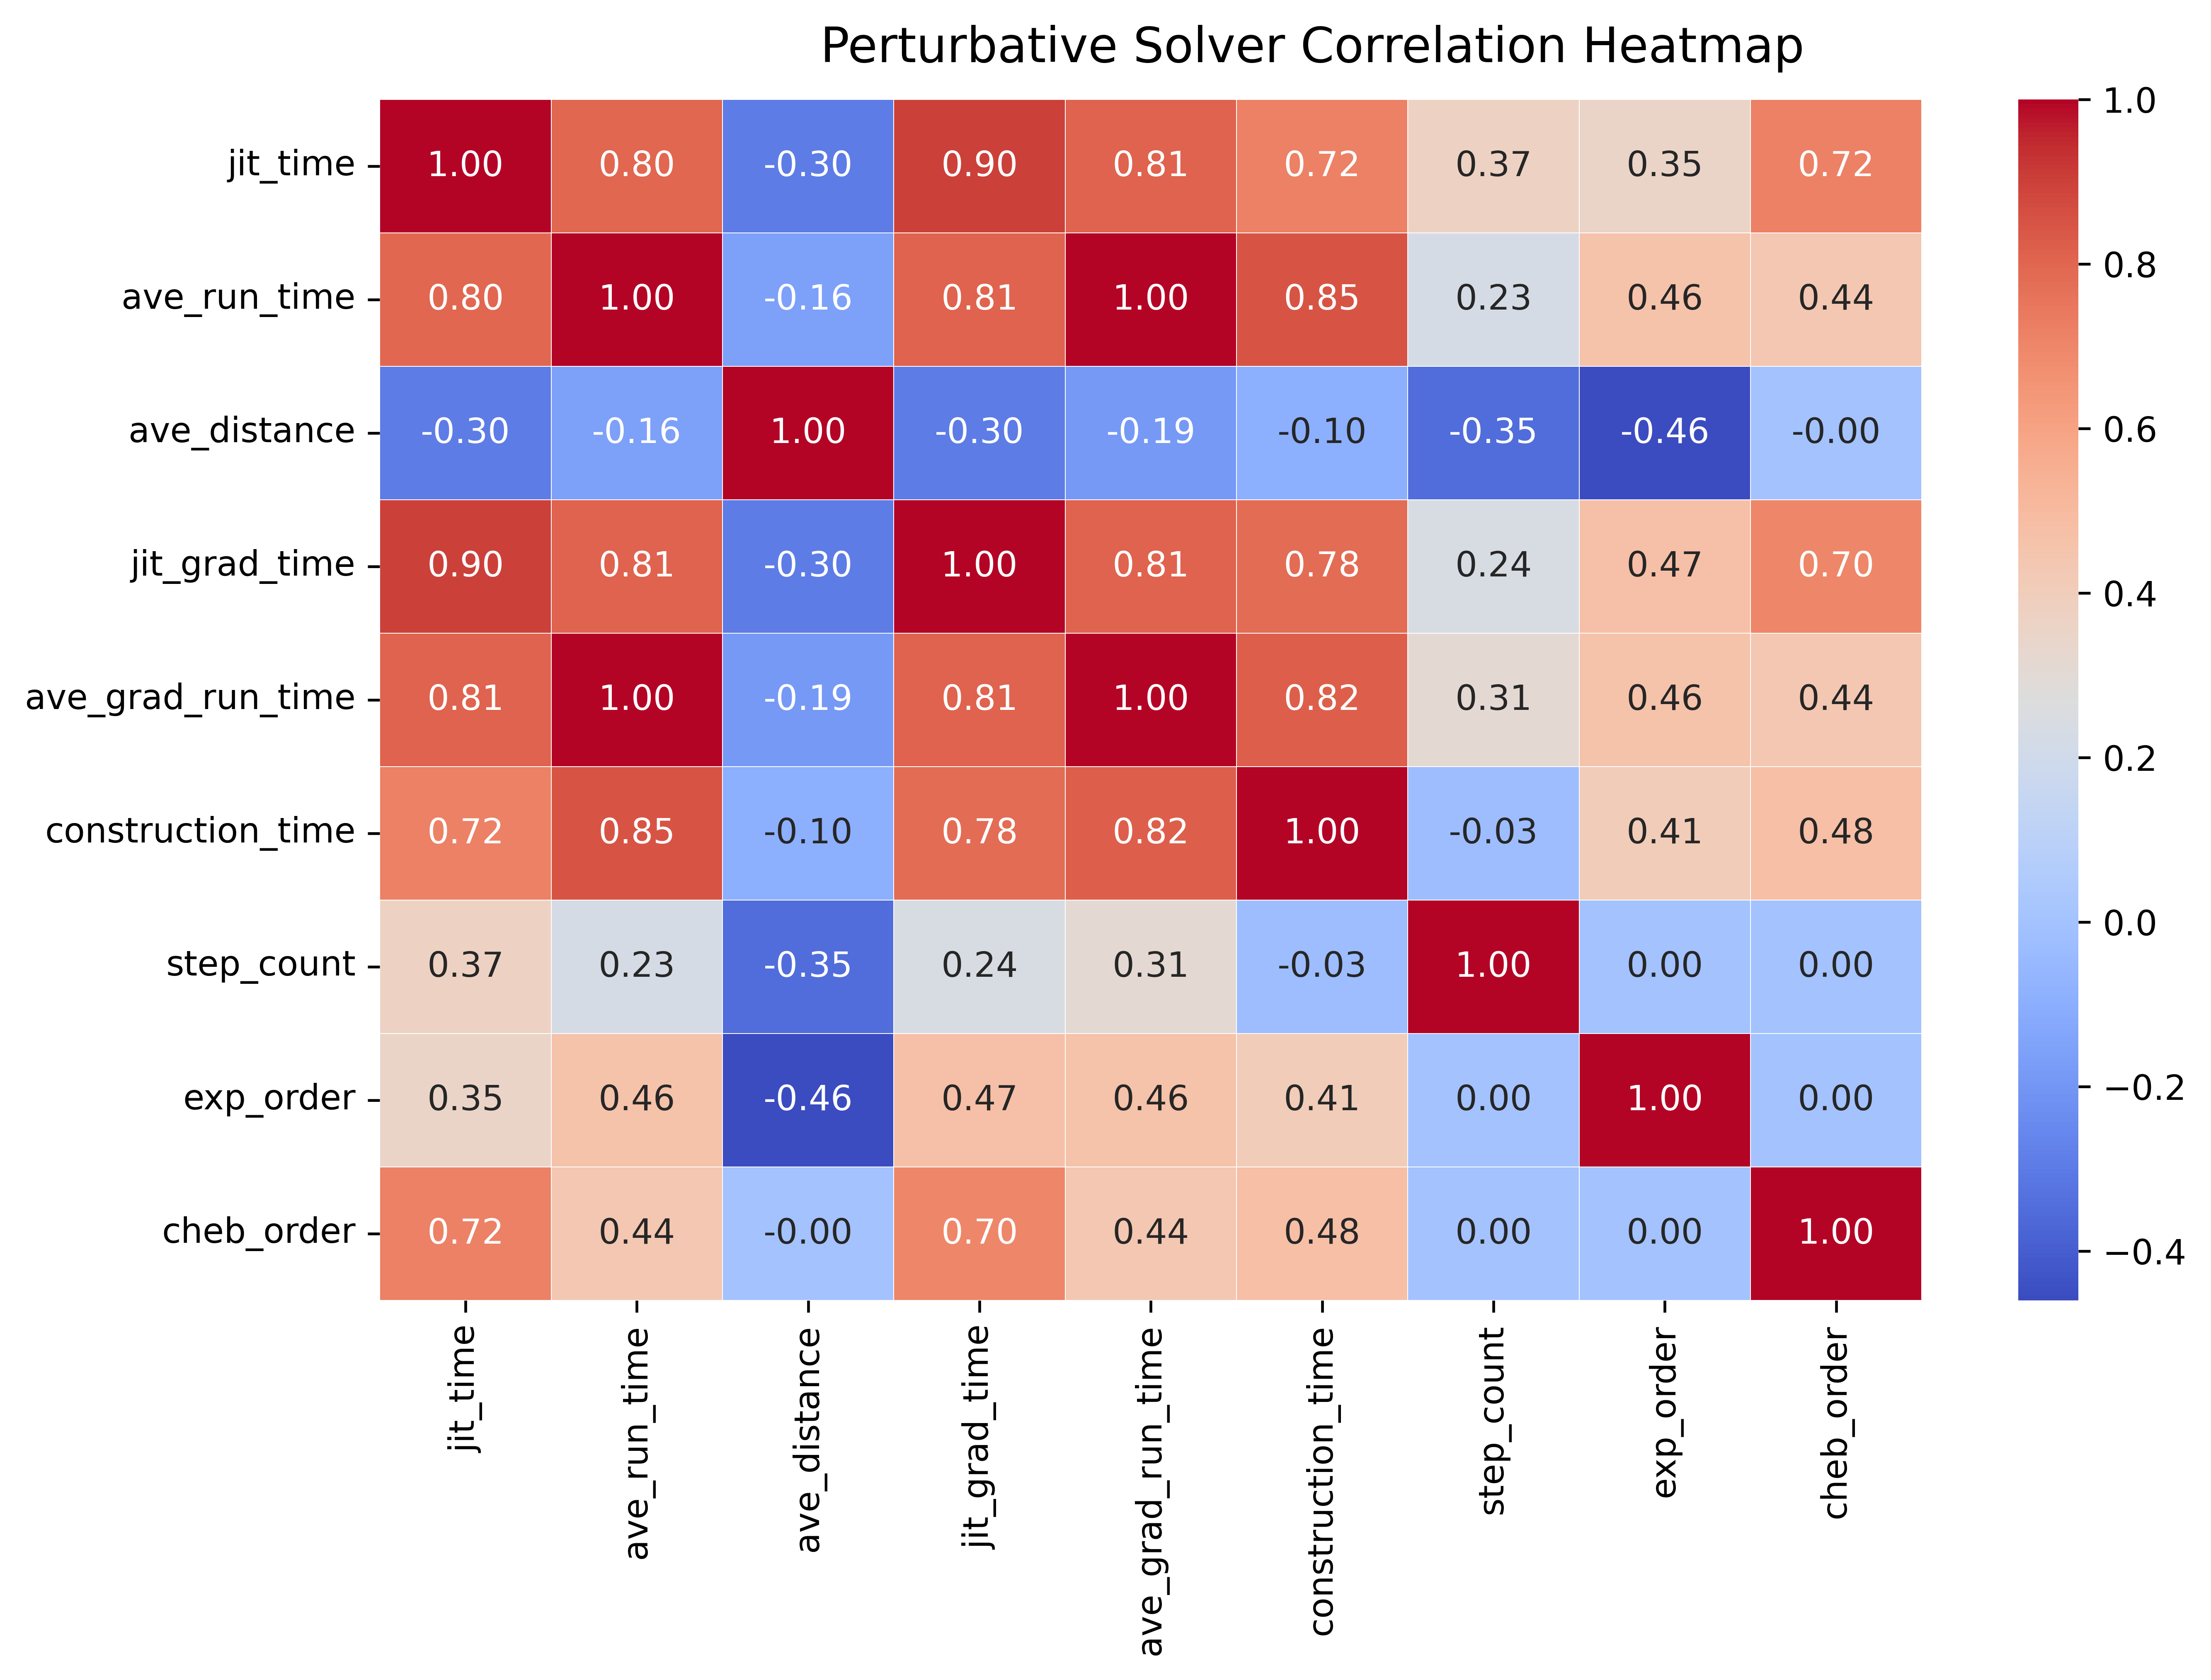

In [21]:
# Correlation Matrix Heatmap
import matplotlib.pyplot as plt
import numpy as np
f, ax = plt.subplots(figsize=(10, 6))
df_pert_scaled = df_pert.copy()
df_pert_scaled['ave_distance'].map(lambda x: np.exp(x))
corr = df_pert_scaled.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Perturbative Solver Correlation Heatmap', fontsize=14)